<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec R ou Python
</h2>
 <h3 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Partie n°1 : préparation des données
</h3>
</div>

Nous sommes en poste chez La poule qui chante, une entreprise d’agroalimentaire qui souhaite se développer à l'international. Cependant, la liste des pays potentiels dans lesquels s'implanter est longue. Pour cela, nous allons réaliser une analyse des groupements de pays que l'on pourra cibler grâce à différentes méthodes de clustering, puis nous approfondirons l'étude de marché.

Les données qui vont être utilisées seront issues des statistiques de la Food and Agriculture Organization of the United Nations (FAO). A savoir les informations provenant des bilans alimentaires qui sont fournies dans le mail. En plus de cela, nous avons récupéré ceux dont nous allons avoir besoin afin d'élargir les critères de l'analyse telles que les informations de sécurité alimentaire  (la stabilité politique) et des indicateurs macro-économiques (le PIB par habitant ). On a procéder également à la création de nouvelles variables/ indicateurs (taux de croissance de la population, la consommation moyenne de volailles par personne, la consommation totale de voilles, le ratio_Importation_Consommation, le ratio_production_consommation) en se basant sur les variables d'origines mise à disposition. Ces indicateurs ont été choisis  pour objectif de pouvoir caractériser les pays et mieux interpréter les données. Voici le plan du projet :

# Sommaire
1. [Préparation des données : importatiions des librairies et des données](#paragraph1)
2. [ Création du dtaframe final ](#paragraph2)    
3. [ Traitement du dataframe final : doublons, valeurs manquantes et outliers ](#paragraph3) 
4. [ Exportation du dataframe final ](#paragraph4) 


# Préparation des données : importations des librairies et des données 

## Importation des librairies

In [1]:
#Importation des la librairies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


## Imporatations des datasets

Nous allons importer chacun des datasets nécessairent puis extraire, éventuellement calculer et compiler les indicateurs dans un DataFrame final.

In [2]:
#Importation et affichage des premieres lignes du fichier Population_2000_2018.csv 
df_population = pd.read_csv('Population_2000_2018.csv')
df_population.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


In [3]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [4]:
#Importation et affichage des premieres lignes du fichier DisponibiliteAlimentaire_2017.csv 
df_disponibilite = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
df_disponibilite.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées


In [5]:
df_disponibilite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [6]:
#Importation et affichage des premieres lignes du fichier Indicateurs_Macro_économiques_2017.csv 
df_macro = pd.read_csv('Indicateurs_Macro_économiques_2017.csv')
df_macro .head(3)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,4.865789,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6723.928582,X,Ciffre de sources internationales,NaN


In [7]:
df_macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            422 non-null    object 
 1   Domaine                 422 non-null    object 
 2   Code zone (M49)         422 non-null    int64  
 3   Zone                    422 non-null    object 
 4   Code Élément            422 non-null    int64  
 5   Élément                 422 non-null    object 
 6   Code Produit            422 non-null    int64  
 7   Produit                 422 non-null    object 
 8   Code année              422 non-null    int64  
 9   Année                   422 non-null    int64  
 10  Unité                   422 non-null    object 
 11  Valeur                  422 non-null    float64
 12  Symbole                 422 non-null    object 
 13  Description du Symbole  422 non-null    object 
 14  Note                    0 non-null      fl

In [8]:
#Importation et affichage des premieres lignes du fichier Indicateurs_Macro_économiques_2017.csv 
df_securite = pd.read_csv('Sécurité_Alimentaire_2017.csv')
df_securite .head(3)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-2.80,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.28,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.38,X,Ciffre de sources internationales,NaN


In [9]:
df_securite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            196 non-null    object 
 1   Domaine                 196 non-null    object 
 2   Code zone (M49)         196 non-null    int64  
 3   Zone                    196 non-null    object 
 4   Code Élément            196 non-null    int64  
 5   Élément                 196 non-null    object 
 6   Code Produit            196 non-null    int64  
 7   Produit                 196 non-null    object 
 8   Code année              196 non-null    int64  
 9   Année                   196 non-null    int64  
 10  Unité                   0 non-null      float64
 11  Valeur                  196 non-null    float64
 12  Symbole                 196 non-null    object 
 13  Description du Symbole  196 non-null    object 
 14  Note                    0 non-null      fl

In [10]:
# Dictionnaire des DataFrames
dataframes = {
    'df_disponibilite': df_disponibilite,
    'df_macro': df_macro,
    'df_population': df_population,
    'df_securite': df_securite
}

# Crée la liste des noms de DataFrames
dfs = ['df_disponibilite', 'df_macro', 'df_population', 'df_securite']

# Affichage de la taille des DataFrames
print(f'Dimensions des DataFrames :')
for df_name in dfs:
    df = dataframes[df_name]
    print(f'- {df_name} : {df.shape}')

Dimensions des DataFrames :
- df_disponibilite : (176600, 14)
- df_macro : (422, 15)
- df_population : (4411, 15)
- df_securite : (196, 15)


Les quatres DataFrames comportent des valeurs manquantes dans la colonne « Note ». Cela n'a pas d'importance car cette colonne ne nous servira pas.

In [11]:
# Calcul et affichage du nombre de valeurs uniques (pays) dans la colonne  "zone"
print("Nombre de pays pour chaque DataFrame :")
for df_name in dfs:
    df = dataframes[df_name]
    unique_zones = df['Zone'].nunique()
    print(f'- {df_name} : {unique_zones}')

Nombre de pays pour chaque DataFrame :
- df_disponibilite : 174
- df_macro : 211
- df_population : 238
- df_securite : 196


C'est le DataFrame population qui contient le plus de pays. Si des pays doivent être retirés à cause d'un nombre de données manquantes trop important, nous le ferons par la suite.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; > Création du DataFrame final
</h2>
</div>

# Création du DataFrame final


## df_population : filtre sur la population en 2017 :


In [12]:
# Création du DataFrame final à partir de celui de la population
df_final = df_population.copy()

# Filtre 'annee 2017' et ne conserve que les variables utiles
df_final = df_final.loc[
    df_final['Année'] == 2017, ['Code zone', 'Zone', 'Valeur']
].reset_index(drop=True)

# Renommer la colonne 'valeur'
df_final = df_final.rename(
    columns={'Valeur': 'population_milliers_hab'})

df_final.head(3)

,Code zone,Zone,population_milliers_hab
0,2,Afghanistan,36296.113
1,202,Afrique du Sud,57009.756
2,3,Albanie,2884.169


**Calcul du taux de croissance de la population sur la période 2000-2018:**

In [13]:
# Créer un dataframe intermédiaire 
df_inter = df_population.copy()

# Filtrer pour obtenir les années de début et de fin
start_year = 2000
end_year = 2018

# Obtenir les populations de la première et de la dernière année
start_pop = df_inter[df_inter['Année'] == start_year]
end_pop = df_inter[df_inter['Année'] == end_year]

# Fusionner les DataFrames pour avoir les valeurs initiales et finales sur la même ligne
merged_df = pd.merge(start_pop, end_pop, on='Zone', suffixes=('_début', '_fin'))

# Calculer le taux de croissance pour chaque Zone
merged_df['Taux_Croissance'] = (merged_df['Valeur_fin'] / merged_df['Valeur_début']) ** (1 / (end_year - start_year)) - 1

# Convertir le taux de croissance en pourcentage
merged_df['Taux_Croissance'] = merged_df['Taux_Croissance'] * 100

# Sélectionner les colonnes nécessaires
result_df = merged_df[['Zone', 'Taux_Croissance']]

# Afficher les résultats
print(result_df)


                                       Zone  Taux_Croissance
0                               Afghanistan         3.283677
1                            Afrique du Sud         1.403732
2                                   Albanie        -0.454795
3                                   Algérie         1.724390
4                                 Allemagne         0.116470
..                                      ...              ...
222  Venezuela (République bolivarienne du)         0.990177
223                                Viet Nam         0.997729
224                                   Yémen         2.775979
225                                  Zambie         2.875873
226                                Zimbabwe         1.088877

[227 rows x 2 columns]


In [14]:
# Ajouter la colonne Taux_Croissance au DataFrame final
df_final = pd.merge(df_final, result_df, on='Zone', how='left')
del result_df
# Afficher le DataFrame avec la nouvelle colonne
df_final.head(3)



,Code zone,Zone,population_milliers_hab,Taux_Croissance
0,2,Afghanistan,36296.113,3.283677
1,202,Afrique du Sud,57009.756,1.403732
2,3,Albanie,2884.169,-0.454795


## df_disponibilite :

**Clacul de la comsommation totale de poulets :**

In [15]:

# Créer un DataFrame temporaire en filtrant sur les produits 'Viande de Volailles' et l'élément 'Disponibilité alimentaire en quantité (kg/personne/an)'
df_temp = df_disponibilite.loc[
    (df_disponibilite['Élément'] == 'Disponibilité alimentaire en quantité (kg/personne/an)') &
    (df_disponibilite['Produit'] == 'Viande de Volailles'), ['Zone', 'Valeur']
].reset_index(drop=True)

# Renommer la colonne 'Valeur'
df_temp = df_temp.rename(columns={'Valeur': 'Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)'})

# Vérifier si la colonne 'Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)' existe déjà dans df_final avant de faire la fusion
if 'Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)' not in df_final.columns:
    df_merged = pd.merge(df_final, df_temp, on='Zone', how='left')  # Utilisation de 'how="left"' pour s'assurer de garder tous les pays de df_final
else:
    df_merged = df_final.copy()

# Vérifier si la colonne 'Consommation_Totale_Volailles (kg)' existe déjà avant de la créer
if 'Consommation_Totale_Volailles (kg)' not in df_merged.columns:
# Calculer la consommation totale de volailles 
   df_merged['Consommation_Totale_Volailles (kg)'] = df_merged['Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)'] * df_merged['population_milliers_hab']*1000

# Remplir les valeurs manquantes éventuelles avec 0 (au cas où il y a des pays sans données de consommation de volailles)
   #df_merged['Consommation_Totale_Volailles (kg)'] = df_merged['Consommation_Totale_Volailles (kg)'].fillna(0)

# Sélectionner les colonnes nécessaires pour df_final (exclure 'Consommation_Totale_Volailles (kg)')
df_final = df_merged.copy()

# Afficher le DataFrame final
df_final.head(3)


,Code zone,Zone,population_milliers_hab,Taux_Croissance,Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans),Consommation_Totale_Volailles (kg)
0,2,Afghanistan,36296.113,3.283677,1.53,5.553305e+07
1,202,Afrique du Sud,57009.756,1.403732,35.69,2.034678e+09
2,3,Albanie,2884.169,-0.454795,16.36,4.718500e+07


**Calcul du ratio_Importation_Consommation :**

In [16]:
# Créer un DataFrame temporaire en filtrant sur les produits 'Viande de Volailles' et l'élément 'Importations - Quantité'
df_import_temp = df_disponibilite.loc[
    (df_disponibilite['Élément'] == 'Importations - Quantité') &
    (df_disponibilite['Produit'] == 'Viande de Volailles'), ['Zone', 'Valeur']
].reset_index(drop=True)

# Renommer la colonne 'Valeur'
df_import_temp = df_import_temp.rename(columns={'Valeur': 'Importations_Volailles (milliers de tonnes)'})

# Supprimer les colonnes si elles existent déjà dans df_final
if 'Importations_Volailles (milliers de tonnes)' in df_final.columns:
    df_final = df_final.drop(columns=['Importations_Volailles (milliers de tonnes)'])

if 'Ratio_Importation_Consommation' in df_final.columns:
    df_final = df_final.drop(columns=['Ratio_Importation_Consommation'])

# Ajouter la colonne 'Importations_Volailles (milliers de tonnes)' au DataFrame final
df_merged = pd.merge(df_final, df_import_temp, on='Zone', how='left')

# Convertir les importations de milliers de tonnes en kilogrammes (1 millier de tonnes = 1,000,000 kg)
df_merged['Importations_Volailles (kg)'] = df_merged['Importations_Volailles (milliers de tonnes)'] * 1000000

# Calculer le ratio importations / consommation
df_merged['Ratio_Importation_Consommation'] = df_merged['Importations_Volailles (kg)'] / df_merged['Consommation_Totale_Volailles (kg)']

# Convertir le ratio importations / consommation en pourcentage
df_merged['Ratio_Importation_Consommation'] = df_merged['Ratio_Importation_Consommation'] * 100

# Remplir les valeurs manquantes éventuelles avec 0 (au cas où il y a des pays sans données d'importations ou de consommation)
#df_merged['Ratio_Importation_Consommation'] = df_merged['Ratio_Importation_Consommation'].fillna(0)

# Sélectionner les colonnes nécessaires
#df_final = df_merged[['Code zone','Zone','population_milliers_hab' ,'Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)','Taux_Croissance','Ratio_Importation_Consommation']].copy()
df_final= df_merged.copy()
# Afficher le DataFrame final
df_final.head(3)


,Code zone,Zone,population_milliers_hab,Taux_Croissance,Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans),Consommation_Totale_Volailles (kg),Importations_Volailles (milliers de tonnes),Importations_Volailles (kg),Ratio_Importation_Consommation
0,2,Afghanistan,36296.113,3.283677,1.53,5.553305e+07,29.0,29000000.0,52.221152
1,202,Afrique du Sud,57009.756,1.403732,35.69,2.034678e+09,514.0,514000000.0,25.261980
2,3,Albanie,2884.169,-0.454795,16.36,4.718500e+07,38.0,38000000.0,80.534060


**Calcul du ratio_Production_Consommation :**

In [17]:
# Créer un DataFrame temporaire en filtrant sur les produits 'Viande de Volailles' et l'élément 'Importations - Quantité'
df_export_temp = df_disponibilite.loc[
    (df_disponibilite['Élément'] == 'Production') &
    (df_disponibilite['Produit'] == 'Viande de Volailles'), ['Zone', 'Valeur']
].reset_index(drop=True)

# Renommer la colonne 'Valeur'
df_export_temp = df_export_temp.rename(columns={'Valeur': 'Production_Volailles (milliers de tonnes)'})

# Supprimer les colonnes si elles existent déjà dans df_final
if 'Production_Volailles (milliers de tonnes)' in df_final.columns:
    df_final = df_final.drop(columns=['Production_Volailles (milliers de tonnes)'])

if 'Ratio_Production_Consommation' in df_final.columns:
    df_final = df_final.drop(columns=['Ratio_Production_Consommation'])

# Ajouter la colonne 'Exportations_Volailles (milliers de tonnes)' au DataFrame final
df_merged = pd.merge(df_final, df_export_temp, on='Zone', how='left')

# Convertir les importations de milliers de tonnes en kilogrammes (1 millier de tonnes = 1,000,000 kg)
df_merged['Production_Volailles (kg)'] = df_merged['Production_Volailles (milliers de tonnes)'] * 1000000

# Calculer le ratio importations / consommation
df_merged['Ratio_Production_Consommation'] = df_merged['Production_Volailles (kg)'] / df_merged['Consommation_Totale_Volailles (kg)']

# Convertir le ratio importations / consommation en pourcentage
df_merged['Ratio_Production_Consommation'] = df_merged['Ratio_Production_Consommation'] * 100

# Remplir les valeurs manquantes éventuelles avec 0 (au cas où il y a des pays sans données d'importations ou de consommation)
#df_merged['Ratio_Exportation_Consommation'] = df_merged['Ratio_Exportation_Consommation'].fillna(0)

# Sélectionner les colonnes nécessaires
df_final = df_merged[['Code zone','Zone','population_milliers_hab' ,'Taux_Croissance','Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)','Ratio_Importation_Consommation','Ratio_Production_Consommation']]

# Afficher le DataFrame final
df_final.head(3)


,Code zone,Zone,population_milliers_hab,Taux_Croissance,Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans),Ratio_Importation_Consommation,Ratio_Production_Consommation
0,2,Afghanistan,36296.113,3.283677,1.53,52.221152,50.420423
1,202,Afrique du Sud,57009.756,1.403732,35.69,25.261980,81.929418
2,3,Albanie,2884.169,-0.454795,16.36,80.534060,27.551126


**Calcul du taux de dépendance aux importations (Taux_Dependance_Import) :**

In [18]:
import pandas as pd

# Supposons que df_disponibilite et df_final sont déjà définis

# Crée un DataFrame temporaire en filtrant sur 'Produit' pour 'Viande de Volailles'
df_temp = df_disponibilite[df_disponibilite['Produit'] == 'Viande de Volailles']

# Pivoter 'Élément'
df_temp = (
    df_temp.pivot_table(index='Zone', columns='Élément', values='Valeur')
    .reset_index().rename_axis(None, axis='columns').fillna(0)
)

# Calculer le taux de dépendance aux importations
df_temp['Taux_Dependance_Import'] = (
    df_temp['Importations - Quantité']
    / (df_temp['Production']
       + df_temp['Importations - Quantité']
       - df_temp['Exportations - Quantité'])
    * 100
).round(2)

# Vérifier si la colonne 'Taux_Dependance_Import' existe déjà dans df_final avant de faire la fusion
if 'Taux_Dependance_Import' not in df_final.columns:
    df_final = pd.merge(
        df_final,
        df_temp[['Zone', 'Taux_Dependance_Import']],
        how='left',
        on='Zone'
    )

# Supprimer df_temp pour libérer de la mémoire
del df_temp

# Afficher les trois premières lignes de df_final
df_final.head(3)


,Code zone,Zone,population_milliers_hab,Taux_Croissance,Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans),Ratio_Importation_Consommation,Ratio_Production_Consommation,Taux_Dependance_Import
0,2,Afghanistan,36296.113,3.283677,1.53,52.221152,50.420423,50.88
1,202,Afrique du Sud,57009.756,1.403732,35.69,25.261980,81.929418,24.27
2,3,Albanie,2884.169,-0.454795,16.36,80.534060,27.551126,74.51


## df_macro : les données macro-économiques (PIB)

In [19]:
# Crée un DataFrame temporaire en filtrant 'element' et 'produit'
df_temp = df_macro.loc[
    (df_macro['Élément'] == 'Valeur US $ par habitant') & (df_macro['Produit'] == 'Produit Intérieur Brut')
]

# Renomme les variables
df_temp = df_temp.rename(columns={'Valeur': 'PIB_personne_US$'})

# Ajoute la variable à 'df_final' si elle n'existe pas déjà
if 'PIB_personne_US$' not in df_final.columns:
    df_final = pd.merge(df_final, df_temp[['Zone', 'PIB_personne_US$']], how='left', on='Zone')

# Choix des colonnes utiles
colonnes_utiles = ['Code zone', 'Zone', 'population_milliers_hab', 'Taux_Croissance', 
                   'Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)', 
                   'Ratio_Importation_Consommation', 'Ratio_Production_Consommation', 'Taux_Dependance_Import',
                   'PIB_personne_US$']

# Sélectionner les colonnes utiles dans l'ordre spécifié
df_final = df_final[colonnes_utiles]

# Affichage du DataFrame final
df_final.head()


,Code zone,Zone,population_milliers_hab,Taux_Croissance,Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans),Ratio_Importation_Consommation,Ratio_Production_Consommation,Taux_Dependance_Import,PIB_personne_US$
0,2,Afghanistan,36296.113,3.283677,1.53,52.221152,50.420423,50.88,530.149831
1,202,Afrique du Sud,57009.756,1.403732,35.69,25.261980,81.929418,24.27,6723.928582
2,3,Albanie,2884.169,-0.454795,16.36,80.534060,27.551126,74.51,4521.752217
3,4,Algérie,41389.189,1.724390,6.38,0.757395,104.141804,0.72,4134.936055
4,79,Allemagne,82658.409,0.116470,19.47,52.318959,94.074709,49.24,44670.222282


## df_securite : indice de stabilité politique


In [20]:
# Renomme les variables
df_securite = df_securite.rename(columns={'Valeur': 'indice_stabilite_politique'})

# Ajoute la variable à 'df_final' si elle n'existe pas déjà
if 'indice_stabilite_politique' not in df_final.columns:
    df_final = pd.merge(df_final, df_securite[['Zone', 'indice_stabilite_politique']], how='left', on='Zone')

# Choix des colonnes utiles
colonnes_utiles = ['Code zone', 'Zone', 'population_milliers_hab', 'Taux_Croissance', 
                   'Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)', 
                   'Ratio_Importation_Consommation', 'Ratio_Production_Consommation', 'Taux_Dependance_Import',
                   'PIB_personne_US$','indice_stabilite_politique']

# Sélectionner les colonnes utiles dans l'ordre spécifié
df_final = df_final[colonnes_utiles]

# Affichage du DataFrame final
df_final.head()


,Code zone,Zone,population_milliers_hab,Taux_Croissance,Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans),Ratio_Importation_Consommation,Ratio_Production_Consommation,Taux_Dependance_Import,PIB_personne_US$,indice_stabilite_politique
0,2,Afghanistan,36296.113,3.283677,1.53,52.221152,50.420423,50.88,530.149831,-2.80
1,202,Afrique du Sud,57009.756,1.403732,35.69,25.261980,81.929418,24.27,6723.928582,-0.28
2,3,Albanie,2884.169,-0.454795,16.36,80.534060,27.551126,74.51,4521.752217,0.38
3,4,Algérie,41389.189,1.724390,6.38,0.757395,104.141804,0.72,4134.936055,-0.92
4,79,Allemagne,82658.409,0.116470,19.47,52.318959,94.074709,49.24,44670.222282,0.59


## Vérification du fataframe finale "df_final"

In [21]:
df_final.head()

,Code zone,Zone,population_milliers_hab,Taux_Croissance,Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans),Ratio_Importation_Consommation,Ratio_Production_Consommation,Taux_Dependance_Import,PIB_personne_US$,indice_stabilite_politique
0,2,Afghanistan,36296.113,3.283677,1.53,52.221152,50.420423,50.88,530.149831,-2.80
1,202,Afrique du Sud,57009.756,1.403732,35.69,25.261980,81.929418,24.27,6723.928582,-0.28
2,3,Albanie,2884.169,-0.454795,16.36,80.534060,27.551126,74.51,4521.752217,0.38
3,4,Algérie,41389.189,1.724390,6.38,0.757395,104.141804,0.72,4134.936055,-0.92
4,79,Allemagne,82658.409,0.116470,19.47,52.318959,94.074709,49.24,44670.222282,0.59


In [22]:
print(f'La dimension du DataFrame final : {df_final.shape}')


La dimension du DataFrame final : (236, 10)


On peut supprimer le code le zone qui ne sera plus utile.

In [23]:
df_final = df_final.drop(columns=['Code zone'])

**Type des données :**

In [24]:
df_final.dtypes

Zone                                                              object
population_milliers_hab                                          float64
Taux_Croissance                                                  float64
Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)    float64
Ratio_Importation_Consommation                                   float64
Ratio_Production_Consommation                                    float64
Taux_Dependance_Import                                           float64
PIB_personne_US$                                                 float64
indice_stabilite_politique                                       float64
dtype: object

Le type des données est correct, toutes les variables sont quantitatives.

# Triatement des données : valeurs manquantes, doublons et outliers

## Les doublons :

In [25]:
print(f'Nombre de doublons dans le DataFrame : {df_final.duplicated().sum()}')

Nombre de doublons dans le DataFrame : 0


## Les valeurs manquantes :

In [26]:
df_final.isnull().sum()

Zone                                                              0
population_milliers_hab                                           0
Taux_Croissance                                                   9
Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)    64
Ratio_Importation_Consommation                                   66
Ratio_Production_Consommation                                    68
Taux_Dependance_Import                                           66
PIB_personne_US$                                                 28
indice_stabilite_politique                                       41
dtype: int64

On observe une présence non négligeable de valeurs manquantes. Nous allons procéder au nettoyage des données en gardent la liste des pays avant nettoyage pour pouvoir la comparer avec celle après nettoyage.

On considére les colonnes "Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)", "Ratio_Importation_Consommation", "Ratio_Exportation_Consommation", et "Taux_Dependance_Import" comme critiques car elles semblent directement liées à notre objectif de réaliser une analyse de marché. Donc, nous avons opter pour la suppression des lignes avec des valeurs manquantes pour des colonnes critiques. 

Par contre pour les autres colonnes on a remplacé par la moyenne.


In [27]:
# Liste des colonnes que nous considérons comme critiques
colonnes_critiques = [
    'Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)',
    'Ratio_Importation_Consommation',
    'Ratio_Production_Consommation',
    'Taux_Dependance_Import'
]

# Liste des colonnes que nous souhaiterons imputer
colonnes_a_imputer = [
    'Taux_Croissance',
    'PIB_personne_US$',
    'indice_stabilite_politique'
]

# Imputation avec la moyenne pour les colonnes sélectionnées
for colonne in colonnes_a_imputer:
    df_final[colonne].fillna(df_final[colonne].mean(), inplace=True)

# Suppression des lignes avec des valeurs manquantes pour les colonnes critiques
df_final.dropna(subset=colonnes_critiques, inplace=True)

# Affichage du DataFrame final après traitement des valeurs manquantes
print(df_final.isnull().sum())  # Vérifier les valeurs manquantes restantes

# Afficher la dimension du DataFrame final
print(f'La dimension du dataframe final après traitement des données : {df_final.shape}')


Zone                                                             0
population_milliers_hab                                          0
Taux_Croissance                                                  0
Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)    0
Ratio_Importation_Consommation                                   0
Ratio_Production_Consommation                                    0
Taux_Dependance_Import                                           0
PIB_personne_US$                                                 0
indice_stabilite_politique                                       0
dtype: int64
La dimension du dataframe final après traitement des données : (168, 9)


## Identification et traitement des outliers 

Bien que l'ACP soit généralement robuste aux outliers, leur présence peut néanmoins affecter les résultats,la présence des outliers peut augmenter la variance totale des données, ce qui peut conduire à une surestimation de la variance expliquée par les premières composantes principales. Cela peut fausser l'interprétation de la proportion de variance expliquée par chaque composante principale.

**Visualisation des outliers :**

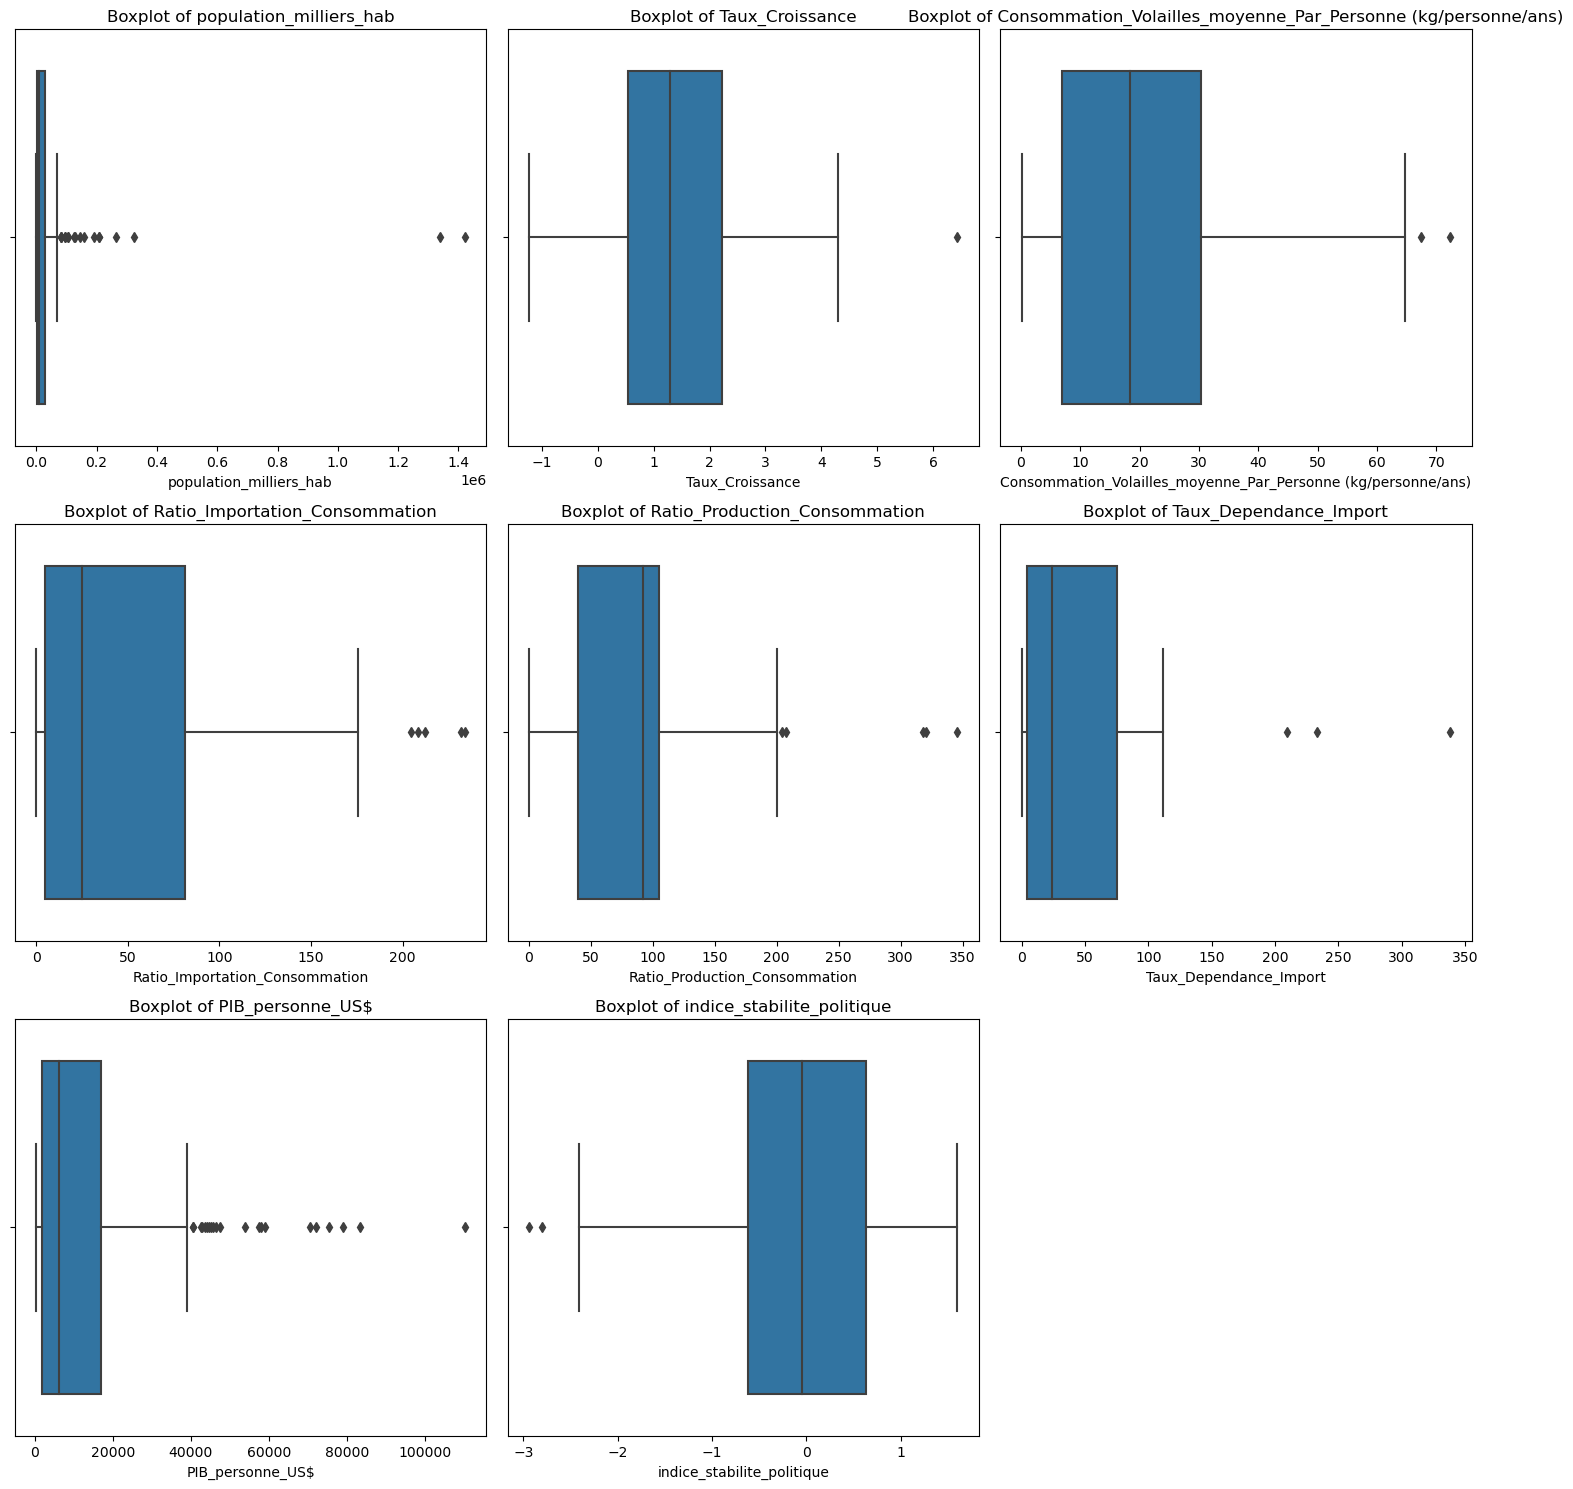

In [28]:
# Sélectionner les colonnes numériques
numerical_cols = df_final.select_dtypes(include=[np.number]).columns

# Définir le nombre de colonnes pour l'affichage côte à côte
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Créer des boxplots pour chaque colonne numérique
plt.figure(figsize=(5 * n_cols, 5 * n_rows))  # Ajuster la taille de la figure selon le nombre de colonnes et de lignes

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Créer un subplot pour chaque colonne
    sns.boxplot(x=df_final[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()  # Ajuster l'espacement entre les subplots
plt.show()


La plupart de nos indicateurs ont quelques valeurs aberrantes. Cela peut compliquer le clustering à venir et il pourrait être utile de traiter ces outliers. Nous allons procéder à la méthode des z-scores pour traiter les outliers.

**Calcul des z-scores :**

In [29]:
# Calcul des z-scores pour chaque colonne numérique
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
z_scores = (df_final[numeric_cols] - df_final[numeric_cols].mean()) / df_final[numeric_cols].std()

# Afficher les z-scores
print("Z-scores:")
print(z_scores)

Z-scores:
     population_milliers_hab  Taux_Croissance  \
0                  -0.047326         1.579693   
1                   0.086493         0.022007   
2                  -0.263182        -1.517931   
3                  -0.014422         0.287699   
4                   0.252195        -1.044592   
..                       ...              ...   
231                -0.091862        -0.320655   
232                 0.329347        -0.314398   
233                -0.101990         1.159024   
234                -0.172933         1.241795   
235                -0.189840        -0.238874   

     Consommation_Volailles_moyenne_Par_Personne (kg/personne/ans)  \
0                                            -1.194342               
1                                             0.953895               
2                                            -0.261721               
3                                            -0.889338               
4                                            -0.066

**Détection et suppression des outliers :**

In [30]:
# Détection des outliers: z-scores supérieurs à 3 ou inférieurs à -3
outliers = (z_scores > 3) | (z_scores < -3)

# Afficher les outliers
#print("\nOutliers (z-scores > 3 ou < -3):")
#print(outliers)

# Afficher la liste des pays outliers
outlier_zones = df_final[outliers.any(axis=1)]['Zone']
print("Liste des pays outliers:")
print(outlier_zones)

# Supprimer les lignes contenant des outliers
df_final = df_final[~outliers.any(axis=1)]


# Afficher la dimension du  DataFrame nettoyé
print(f' La dimension du Dataframe final nettoyé : {df_final.shape}')


Liste des pays outliers:
0                          Afghanistan
22                            Belgique
41            Chine - RAS de Hong-Kong
42                Chine - RAS de Macao
43                 Chine, continentale
59                 Émirats arabes unis
98                        Îles Salomon
103                               Inde
108                            Islande
126                         Luxembourg
154                            Norvège
166                           Pays-Bas
167                              Pérou
196    Saint-Vincent-et-les Grenadines
213                             Suisse
219                        Timor-Leste
233                              Yémen
Name: Zone, dtype: object
 La dimension du Dataframe final nettoyé : (151, 9)


Les pays listés comme outliers présentent des caractéristiques économiques, politiques, ou sociales qui les différencient nettement de la moyenne globale des pays analysés. Ces différences peuvent être dues à une variété de facteurs, tels que des économies développées, des contextes géopolitiques uniques, des ressources naturelles abondantes, ou des situations de conflit.

# Exportation de df_final


In [31]:
df_final.to_csv('./indicateurs-pays-2017.csv', index=False)
